# Pymaceuticals Inc.
---

### Analysis

- Correlation between avg. tumor volume and mouse weight has a value of 0.84 which is close to 1, indicating that there is a strong correlation of the weight of the mouse and the size of the tumor.

- Infubinol has the worst effectiveness towards the tumor. At the end of the regiment, some mouses had tumors between 50 to 60 mm  and some even reaching up top 72 mm.

- Capomulin drug has the most Timepoints, on the other hand, Propiva drug has the least number of Timepoints. Also, the mean of Capomulin and Ramicane is very close, making both of them the most efficient against Tumors compared to the other regiments. It's also worth to note that the difference of timepoints between these two and the other regimens is around 40 timepoints which could influence in the results.

- Infubinol is the only drug regimen box plot that contains an outlier meaning that the data has few to none outliers that can influence the data and therefore we can have satisfying conclusions based on the data.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how="inner")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
uni_mice = combined_df[list(combined_df.duplicated(subset=['Mouse ID', 'Timepoint']))]
uni_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
#clean_combined_df = combined_df[combined_df['Mouse ID'] != 'g989']
#clean_combined_df.nunique()

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df[combined_df['Mouse ID'] != 'g989']
clean_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [12]:
# Checking the number of mice in the clean DataFrame.
clean_combined_df['Mouse ID'].nunique()

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


clean_combined_df2 = clean_combined_df.set_index('Drug Regimen')
clean_combined_df2.columns
mean = clean_combined_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_combined_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_combined_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = clean_combined_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_combined_df2.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

dRegimen_summary=pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std_dev,
    "Tumor Volume Std. Err.":sem
})

dRegimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
clean_combined_df3 = clean_combined_df.groupby('Drug Regimen')[['Tumor Volume (mm3)']].aggregate(['mean','median','var','std','sem'])
clean_combined_df3
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

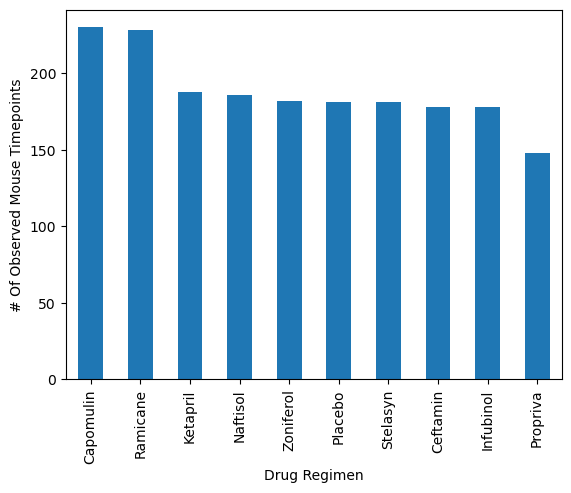

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_df1 = clean_combined_df.groupby('Drug Regimen')['Timepoint'].count()
plot_df1 = plot_df1.sort_values(ascending=False)
bar_graph = plot_df1.plot(kind='bar',ylabel="# Of Observed Mouse Timepoints")

In [93]:
plot_df1

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


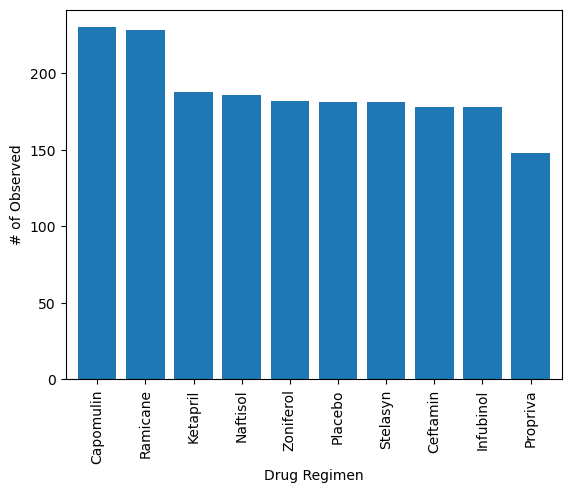

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plot_df1 = plot_df1.to_frame()
plot_df1
plot_df1.plot.bar(ylabel="# of Observed", legend=False, width=0.8)
plt.show()

<Axes: ylabel='Sex'>

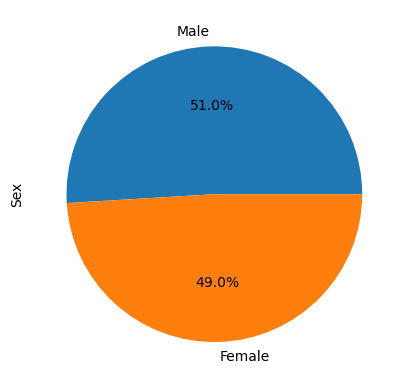

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plot_df2=clean_combined_df.groupby('Sex')['Sex'].count()
plot_df2=plot_df2.sort_index(ascending=False)
plot_df2.plot(kind='pie',autopct='%1.1f%%')

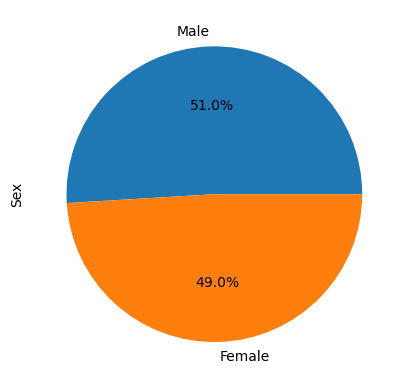

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot_df2=clean_combined_df.groupby('Sex')['Sex'].count()
plot_df2=plot_df2.sort_index(ascending=False)
plot2 = plot_df2.plot.pie(y='Timepoint',autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_combined_df[clean_combined_df['Drug Regimen']=='Capomulin']
Ramicane_df = clean_combined_df[clean_combined_df['Drug Regimen']=='Ramicane']
Infubinol_df = clean_combined_df[clean_combined_df['Drug Regimen']=='Infubinol']
Ceftamin_df = clean_combined_df[clean_combined_df['Drug Regimen']=='Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
#Capomulin info
ca_last = Capomulin_df.groupby('Mouse ID')['Timepoint'].max()
ca_last = ca_last.to_frame()
#we want to grab all the details from the clean df based so we perfrom a left join
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ca_merge = ca_last.merge(clean_combined_df, how='left', on=('Mouse ID', 'Timepoint'))
ca_merge



#Ramicane Info
# Start by getting the last (greatest) timepoint for each mouse
ra_last = Ramicane_df.groupby('Mouse ID')['Timepoint'].max()
ra_last = ra_last.to_frame()
#we want to grab all the details from the clean df based so we perfrom a left join
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ra_merge = ra_last.merge(clean_combined_df, how='left', on=('Mouse ID', 'Timepoint'))
ra_merge


#Infubinol Info
# Start by getting the last (greatest) timepoint for each mouse
inf_last = Infubinol_df.groupby('Mouse ID')['Timepoint'].max()
inf_last = inf_last.to_frame()
#we want to grab all the details from the clean df based so we perfrom a left join
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
inf_merge = inf_last.merge(clean_combined_df, how='left', on=('Mouse ID', 'Timepoint'))
inf_merge

#Ramicane Info
# Start by getting the last (greatest) timepoint for each mouse
ce_last = Ceftamin_df.groupby('Mouse ID')['Timepoint'].max()
ce_last = ce_last.to_frame()
#we want to grab all the details from the clean df based so we perfrom a left join
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ce_merge = ce_last.merge(clean_combined_df, how='left', on=('Mouse ID', 'Timepoint'))
ce_merge


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25
5,h531,5,47.784682,0,Ceftamin,Male,5,27
6,j296,45,61.849023,3,Ceftamin,Female,24,30
7,k210,45,68.923185,3,Ceftamin,Male,15,28
8,l471,45,67.748662,1,Ceftamin,Female,7,28
9,l490,30,57.918381,3,Ceftamin,Male,24,26


In [21]:
drug_Reg = [ca_merge,ra_merge,inf_merge,ce_merge]
vol_data = []
name=['Capomulin','Ramicane','Infubinol','Ceftamin']
i = 0;
for drug in drug_Reg:
    quartiles = drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    a_dict = {'Name': None, 'Lower Quartile': None , 'Upper Quartile': None, 'Upper Bound': None ,'Lower Bound': None, 'Median': None, 'Outliers' : []}
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75] 
    med = quartiles[0.5] 
    iqrt = upperq - lowerq
    upperbound = upperq + 1.5 * iqrt
    lowerbound = lowerq - 1.5 * iqrt
    a_dict['Name'] = name[i]
    a_dict['Lower Quartile'] = lowerq
    a_dict['Upper Quartile']= upperq
    a_dict['Upper Bound'] = upperbound
    a_dict['Lower Bound'] = lowerbound 
    a_dict['Median'] = med
    outlier1 = drug[drug['Tumor Volume (mm3)'] > upperbound]
    outlier2 = drug[drug['Tumor Volume (mm3)'] < lowerbound]
    a_dict['Outliers'].append(list(outlier1['Tumor Volume (mm3)']))
    a_dict['Outliers'].append(list(outlier2['Tumor Volume (mm3)']))
    vol_data.append(a_dict) #Will store dictonary containing the stats of each drug treatment
    i = i + 1
#     print(f"The lower quartile of drug is: {lowerq}")
#     print(f"The upper quartile of drug is: {upperq}")
#     print(f"The inter-quartile of drug is: {iqrt}")
#     print(f"The Median  of drug is: {med}")

In [22]:
#for d in vol_data:
vol_data[2]
#inf_merge[inf_merge['Tumor Volume (mm3)'] > 82.7414]
#inf_merge[inf_merge['Tumor Volume (mm3)'] < 36.8329]

#vol_data[2]

{'Name': 'Infubinol',
 'Lower Quartile': 54.04860769,
 'Upper Quartile': 65.52574285,
 'Upper Bound': 82.74144559000001,
 'Lower Bound': 36.83290494999999,
 'Median': 60.16518046,
 'Outliers': [[], [36.3213458]]}

In [23]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

drug_Reg = [ca_merge,ra_merge,inf_merge,ce_merge]
vol_data = []
name=['Capomulin','Ramicane','Infubinol','Ceftamin']
i = 0;

for drug in drug_Reg:
    quartiles = drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    a_dict = {'Name': None, 'Lower Quartile': None , 'Upper Quartile': None, 'Upper Bound': None ,'Lower Bound': None, 'Median': None, 'Outliers' : []}
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75] 
    med = quartiles[0.5] 
    iqrt = upperq - lowerq
    upperbound = upperq + 1.5 * iqrt
    lowerbound = lowerq - 1.5 * iqrt
    a_dict['Name'] = name[i]
    a_dict['Lower Quartile'] = lowerq
    a_dict['Upper Quartile']= upperq
    a_dict['Upper Bound'] = upperbound
    a_dict['Lower Bound'] = lowerbound 
    a_dict['Median'] = med
    outlier1 = drug[drug['Tumor Volume (mm3)'] > upperbound]
    outlier2 = drug[drug['Tumor Volume (mm3)'] < lowerbound]
    a_dict['Outliers'].append(outlier1['Tumor Volume (mm3)'])
    a_dict['Outliers'].append(outlier2['Tumor Volume (mm3)'])
    vol_data.append(a_dict) #Will store dictonary containing the stats of each drug treatment
    print(f"{name[i]}'s potential outliers {a_dict['Outliers']}")
    i = i + 1

Capomulin's potential outliers [Series([], Name: Tumor Volume (mm3), dtype: float64), Series([], Name: Tumor Volume (mm3), dtype: float64)]
Ramicane's potential outliers [Series([], Name: Tumor Volume (mm3), dtype: float64), Series([], Name: Tumor Volume (mm3), dtype: float64)]
Infubinol's potential outliers [Series([], Name: Tumor Volume (mm3), dtype: float64), 5    36.321346
Name: Tumor Volume (mm3), dtype: float64]
Ceftamin's potential outliers [Series([], Name: Tumor Volume (mm3), dtype: float64), Series([], Name: Tumor Volume (mm3), dtype: float64)]


In [24]:
ca_merge[['Drug Regimen','Tumor Volume (mm3)']]
plot_dict = []
i = 0
for drug in drug_Reg:
    temp = drug['Tumor Volume (mm3)']
    temp = temp.to_frame()
    temp = temp.rename(columns={'Tumor Volume (mm3)': name[i]})
    temp = temp[[name[i]]]
    plot_dict.append(temp)
    
    i = i + 1
    
    
    
plot_df = pd.concat(plot_dict, axis=1,join='inner')  

#showing df used to plot
plot_df = pd.concat(plot_dict, axis=1,join='inner') 
plot_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


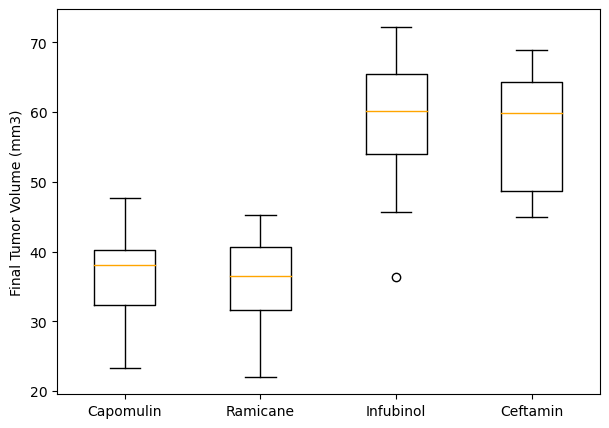

In [95]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plot_df = pd.concat(plot_dict, axis=1,join='inner')  
medianprops = dict(color='orange')
plot_df.boxplot(grid=False, color = 'black',figsize=(7,5), medianprops=medianprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

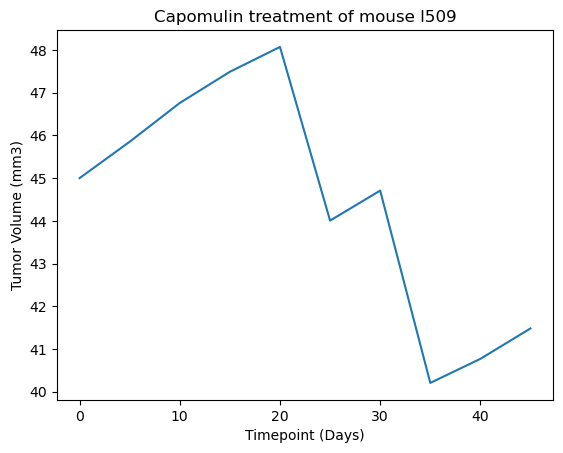

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_all_df = clean_combined_df[clean_combined_df['Drug Regimen'] == 'Capomulin' ]
mouse_line_plot = capo_all_df[capo_all_df['Mouse ID'] == 'l509']
mouse_line_plot.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)',xlabel="Timepoint (Days)", ylabel= 'Tumor Volume (mm3)', legend=False, title='Capomulin treatment of mouse l509')
plt.show()


## Correlation and Regression

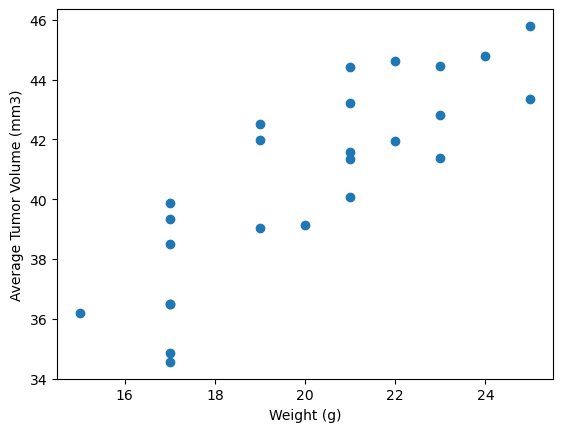

In [83]:
#(slope, intercept, rvalue, pvalue, stderr) = lineregress(x_values,y_values)
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
xvalues = capo_all_df.groupby(['Mouse ID'])['Weight (g)'].unique()
yvalues = capo_all_df.groupby(['Mouse ID'])["Tumor Volume (mm3)"].mean()
xvalues 
plt.scatter(xvalues,yvalues)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


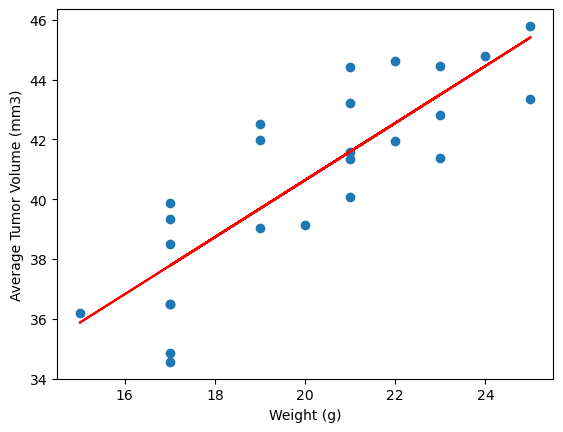

In [92]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
yvalues = yvalues.astype('float')
xvalues = xvalues.astype('float')
xvalues
(slope,intercept, rvalue, pvalue, stderr)=linregress(xvalues, yvalues)
scatter_df = pd.DataFrame({
    "Average Tumor Volume (mm3)": yvalues,
    "Weight (g)" : xvalues
})
corr = scatter_df["Average Tumor Volume (mm3)"].corr(scatter_df["Weight (g)"])
corr = round(corr,2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(xvalues,regress_values,"red")
plt.annotate(line_eq, (5.8,0.8),fontsize = 15, color="red")
plt.scatter(xvalues,yvalues)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

